<a href="https://colab.research.google.com/github/mariofishman/challenge/blob/main/benshuk_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#run this code first:

In [ ]:
# @title
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
from IPython.display import clear_output
import time
import seaborn as sns
from IPython.display import HTML
from IPython.display import IFrame

Y_shifts_m1 = 'https://drive.google.com/uc?export=download&id=1JHivVKOTvgqRYNj6adQ7MaDi9nNG0xcQ'
X_shifts_m1 = 'https://drive.google.com/uc?export=download&id=1p2N8myuGgR8e1VG4i3k1TyLjk-p1lDfG'

x = pd.read_csv(X_shifts_m1, header = None)
y = pd.read_csv(Y_shifts_m1, header = None)

#exploring the data

In [ ]:
def create_df(X, Y):
  df = pd.DataFrame({'X' : X, 'Y': Y})
  return df

When mice brains are filmed their neurons show like the video in the left. The Neurosicentists need a static image to analyze data. Like the one in the right.

In [ ]:
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/LS-OWPV6-KU?si=enARcOcQkOWjDajA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" allowfullscreen></iframe>')

/usr/local/lib/python3.10/dist-packages/IPython/core/display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


The video is split in several chunks. The motion occurs in a non-rigid way. The movement of each chunk has the following behavior.

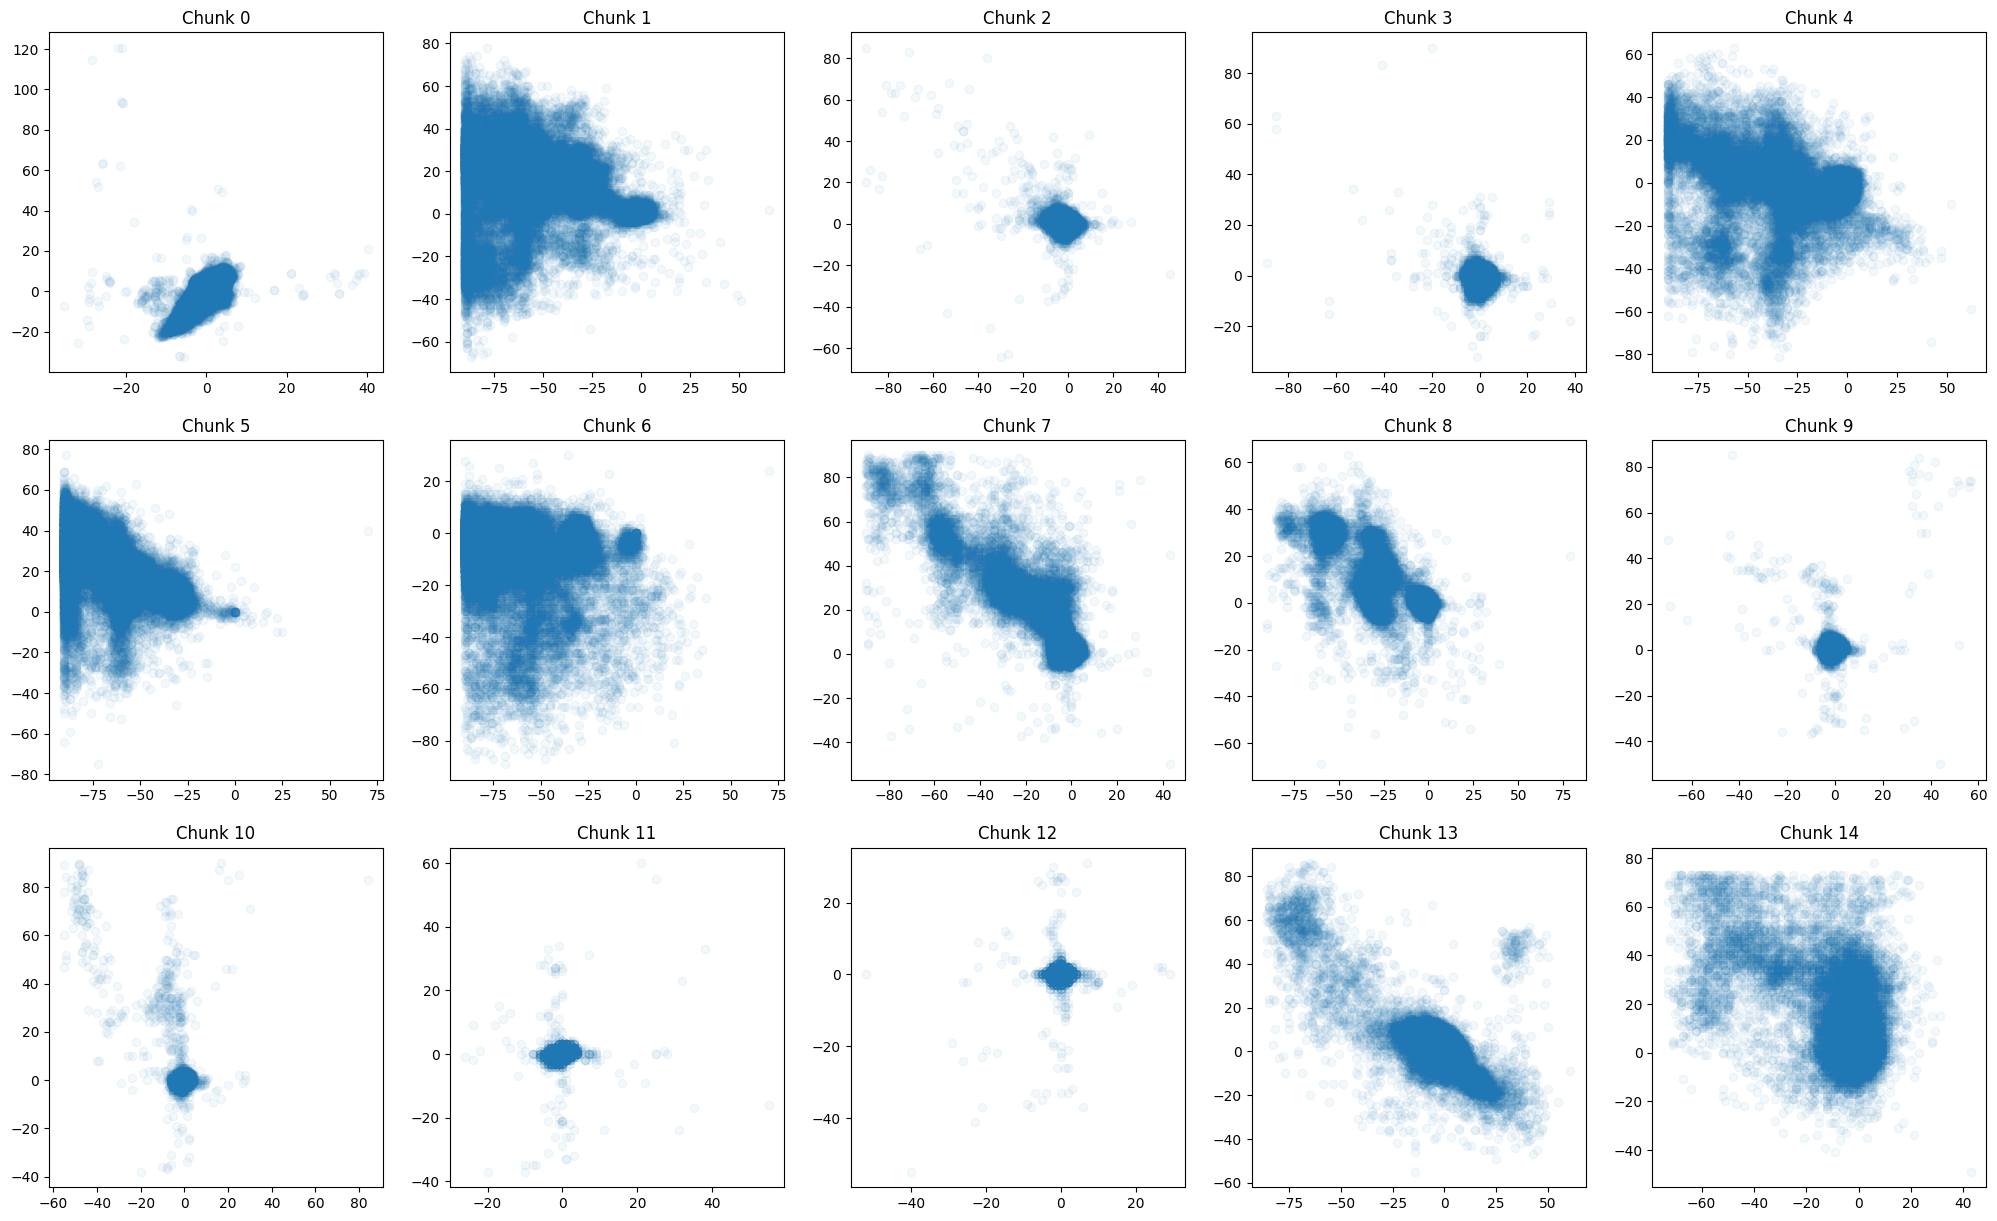

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(25, 15))

for i in range(3):
  for j in range(5):
    k = i*5+j
    df = create_df(x[k], y[k])
    axs[i, j].scatter(df['X'], df['Y'], alpha = 0.05)
    axs[i, j].set_title(f'Chunk {k}')
    # axs[i].set_xlim([-20, 10])
    # axs[i].set_ylim([-30,30])

plt.show()

I chose chunk 13 as an example for this project.

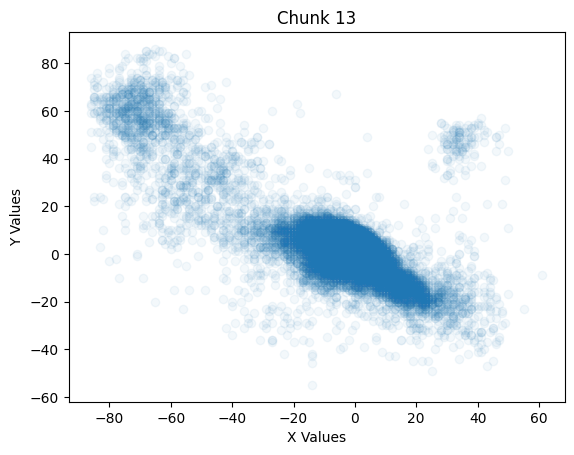

In [ ]:
fig, ax = plt.subplots()
df = create_df(x[13], y[13])
ax.scatter(df['X'], df['Y'], alpha= 0.05)
ax.set_title('Chunk 13')
ax.set_xlabel('X Values')
ax.set_ylabel('Y Values')
plt.savefig('chunk13.png', dpi = 300)

# graphing the distribution

Before graphing I cleaned the outliers.

In [ ]:
def clean_outliers(data, limit=0.04):
  X_Q1 = data['X'].quantile(limit)
  X_Q3 = data['X'].quantile(1-limit)
  X_IQR = X_Q3-X_Q1
  X_lower_bound = X_Q1 - 1.5 * X_IQR
  X_upper_bound = X_Q1 + 1.5 * X_IQR

  Y_Q1 = data['Y'].quantile(limit)
  Y_Q3 = data['Y'].quantile(1-limit)
  Y_IQR = Y_Q3-Y_Q1
  Y_lower_bound = Y_Q1 - 1.5 * Y_IQR
  Y_upper_bound = Y_Q1 + 1.5 * Y_IQR

  clean_data = data.loc[(data['X'] >= X_lower_bound)&
                  (data['X'] <= X_upper_bound)&
                  (data['Y'] >= Y_lower_bound)&
                  (data['Y'] <= Y_upper_bound)]

  return clean_data, X_lower_bound, X_upper_bound, Y_lower_bound, Y_upper_bound

df = create_df(x[13], y[13])
clean_df, X_lower, X_upper, Y_lower, Y_upper = clean_outliers(df)

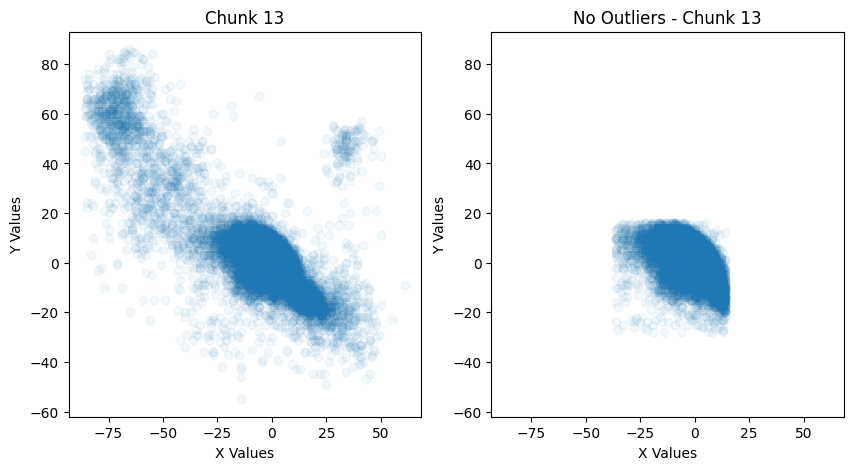

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(df['X'], df['Y'], alpha= 0.05)
axs[0].set_title('Chunk 13')
axs[0].set_xlabel('X Values')
axs[0].set_ylabel('Y Values')


axs[1].scatter(clean_df['X'], clean_df['Y'], alpha= 0.05)
axs[1].set_title('No Outliers - Chunk 13')


xlims = axs[0].get_xlim()
ylims = axs[0].get_ylim()

axs[1].set_xlim(xlims)
axs[1].set_ylim(ylims)

axs[1].set_xlabel('X Values')
axs[1].set_ylabel('Y Values')
plt.savefig('data_with_and_without_outliers.png', dpi = 300)

This and the following is how the distribution looks. To views of the same thing.

(92695, 2)


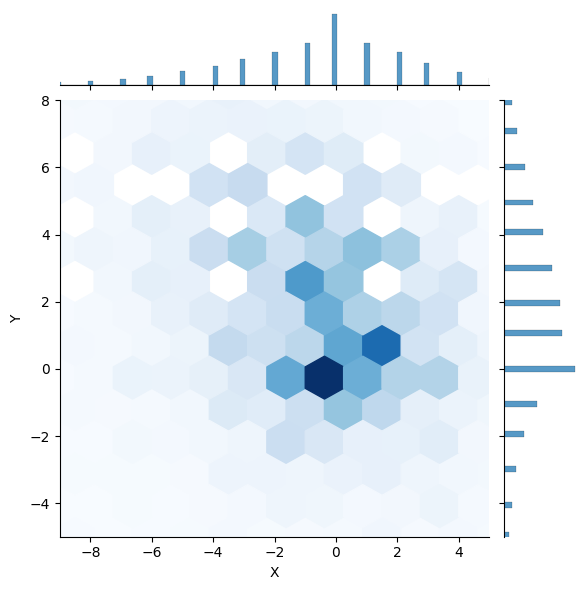

In [ ]:
def plot_dist(data, limit = 0.04):
  x_range = data['X'].quantile([limit, 1-limit])
  y_range = data['Y'].quantile([limit, 1-limit])
  print(data.shape)
  # df = create_df(d['X_shifts_m1'][13], d['Y_shifts_m1'][13])
  plot = sns.jointplot(x = data['X'], y = data['Y'], data = data, kind = 'hex', gridsize=40, cmap='Blues', joint_kws={'mincnt':1, 'vmin':5})
  plot.ax_joint.set_xlim(x_range[limit], x_range[1-limit])
  plot.ax_joint.set_ylim(y_range[limit], y_range[1-limit])
  plt.savefig('joint_distribution.png', dpi = 300)
  plt.show()

plot_dist(clean_df)


(92695, 2)


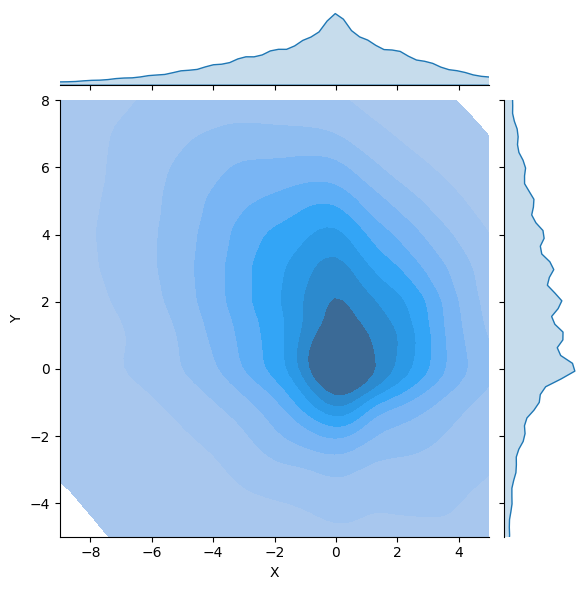

In [ ]:
def plot_distv2(data, limit = 0.04):
  x_range = data['X'].quantile([limit, 1-limit])
  y_range = data['Y'].quantile([limit, 1-limit])
  print(data.shape)
  # df = create_df(d['X_shifts_m1'][13], d['Y_shifts_m1'][13])
  plot = sns.jointplot(x = clean_df['X'], y = clean_df['Y'], data = clean_df, kind = 'kde', fill = True)
  plot.ax_joint.set_xlim(x_range[limit], x_range[1-limit])
  plot.ax_joint.set_ylim(y_range[limit], y_range[1-limit])
  plt.savefig('joint_distributionv2.png', dpi = 300)
  plt.show()

plot_distv2(clean_df)



And the following two charts are the marginal distributions of X and Y

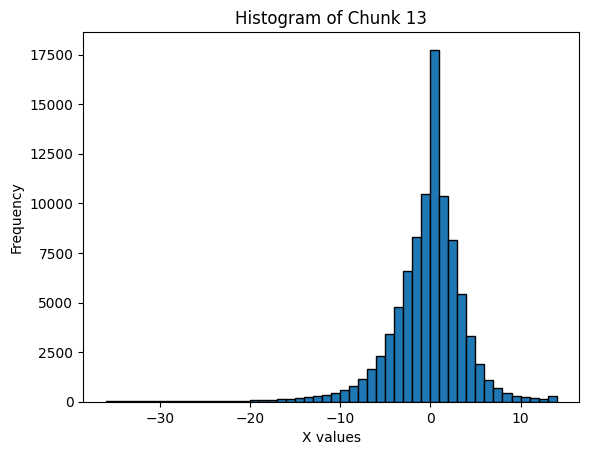

In [ ]:
plt.hist(clean_df['X'],bins = 50, edgecolor = 'black')
plt.title('Histogram of Chunk 13')
plt.xlabel('X values')
plt.ylabel('Frequency')
plt.savefig('marginal_dist_X.png', dpi = 300)

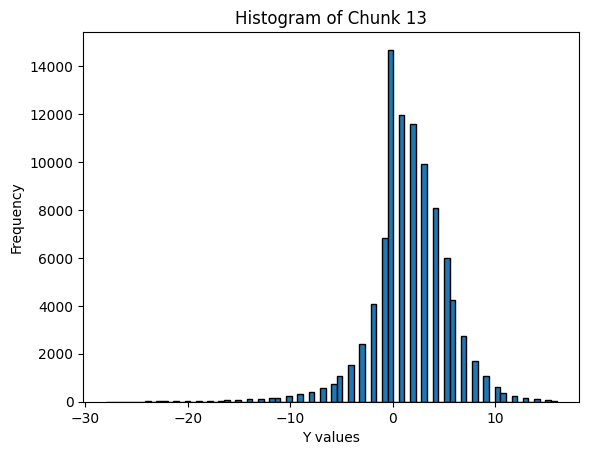

In [ ]:
plt.hist(clean_df['Y'],bins = 80, edgecolor = 'black')
plt.title('Histogram of Chunk 13')
plt.xlabel('Y values')
plt.ylabel('Frequency')
plt.savefig('marginal_dist_Y.png', dpi = 300)

# Conditional X with time lags

Let's explore now the distributions of $X_{t+1}$ for each value $X_{t}$

In [ ]:
#This function splits the distribution in percentiles. I did this to accumulate more X values into a discrete RV of 50 possible values.

def bin_data(data, bins = 50):
  data = data.drop('Y', axis=1).copy()
  bin_labels = range(bins)
  data['X_binned'] = pd.cut(data['X'], bins=bins, labels = bin_labels)
  return data

In [ ]:
#This function willadd a column that is lagged by one period to the original.

def add_lags(data):
  data = data.copy()
  for i in range(1,2):  # Create 5 lagged positions
      data[f'X_lag-{i}'] = data['X_binned'].shift(i)
  data.dropna(inplace = True)
  # data.rename(columns = {'X':'X_lag_0'}, inplace=True)
  return data

In [ ]:
binned_df = bin_data(clean_df)
lagged_df = add_lags(binned_df)

For example, in period 4 $X=-1$. That's bin 34. The previous period that bin was 38.

In [ ]:
lagged_df

,X,X_binned,X_lag-1
1,0,35,34
2,2,37,35
3,3,38,37
4,-1,34,38
5,-2,33,34
...,...,...,...
95606,-1,34,31
95607,-8,27,34
95608,-3,32,27
95609,-2,33,32


* By grouping all events by $X_{t-1}$ and then normalizing the counts I'm efectively getting the frequency distribution of $(X_t|X_{t-1}=x)$
* Then by calculating the idxmax() function I'm getting the mode of $X_t$ for each value of $X_{t-1}$

I was expecting to see a particular distribution of $X_{t}$ values with a mean close to $X_{t-1}=x$. Unfortunately I get a very similar mode (from 32 to 36) for every value (from 0 to 50).

In [ ]:
conditional_counts = lagged_df.groupby(['X_lag-1'])['X_binned'].value_counts(normalize = True).unstack(fill_value=0)
max_bin_per_row = conditional_counts.apply(lambda row: row.idxmax(), axis=1)

In [ ]:
max_bin_per_row

X_lag-1
0     32
1     32
2     35
3     31
4     36
5     30
6     35
7     36
8     34
9     36
10    28
11    32
12    30
13    35
14    31
15    35
16    35
17    34
18    35
19    32
20    32
21    32
22    31
23    35
24    35
25    34
26    35
27    35
28    35
29    35
30    35
31    35
32    35
33    35
34    35
35    35
36    35
37    35
38    35
39    35
40    35
41    35
42    35
43    35
44    34
45    35
46    35
47    35
48    35
49    35
dtype: int64

The following two graphs show the distribution of $X_{t+1}|X_t=x$

The red bar is the value of $x$. In the case of the first chart I'm only rendering $x=0$

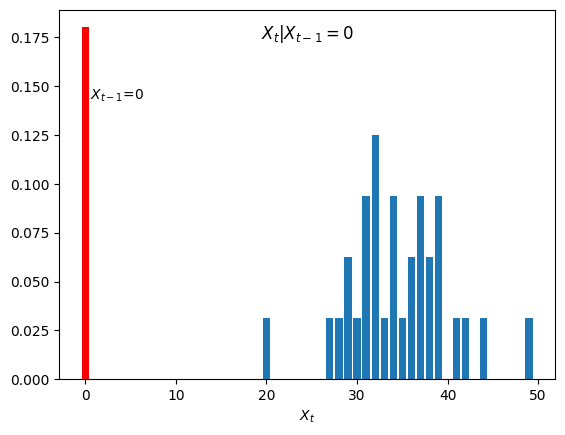

In [ ]:
def most_probable_next_bin(ax, i=0):
  ax.bar(conditional_counts.columns, conditional_counts[conditional_counts.index==i].T[i])
  ax.set_title('$X_t|X_{t-1}=$'+f'{i}', y = 0.80)
  ax.bar(i, 0.18, color='red')
  ax.text(i+0.5, 0.143, '$X_{t-1}$'+f'={i}')
  # ax.set_xlabel('$X_{t}$')

fig, axs = plt.subplots()
most_probable_next_bin(axs, 0)
plt.savefig('Bin0')

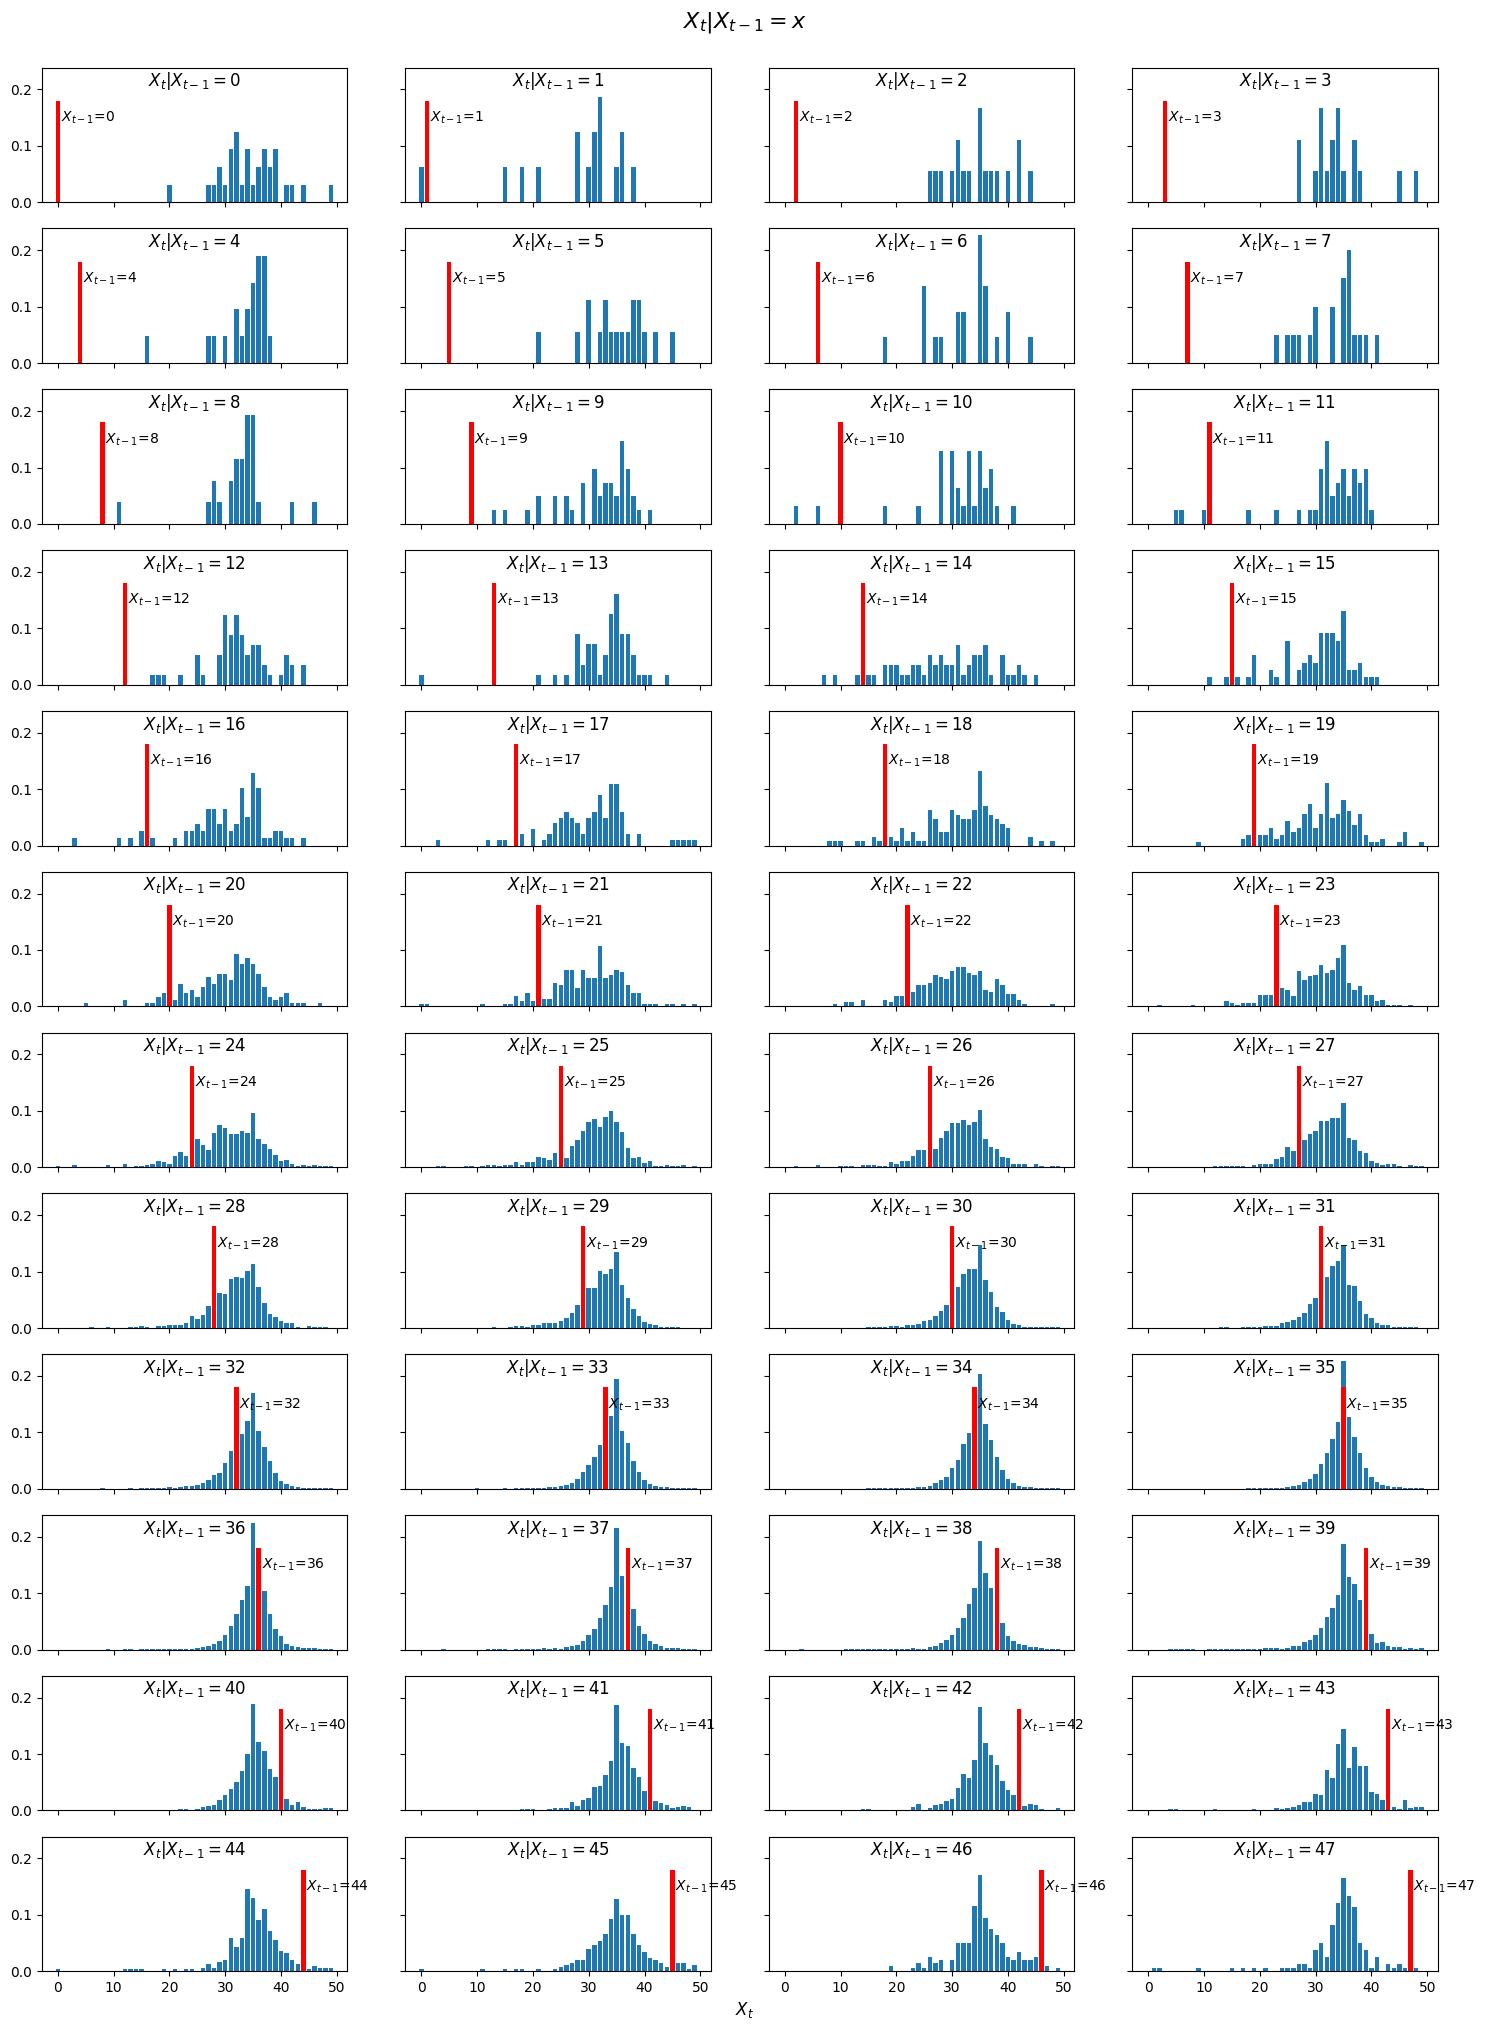

<Figure size 640x480 with 0 Axes>

In [ ]:
nrows = 12
ncols = 4

fig, axs = plt.subplots(nrows, ncols, figsize=(15, 20), sharex=True, sharey=True)
for i in range(nrows):
  for j in range(ncols):
    k = i*ncols + j
    most_probable_next_bin(axs[i,j], k)
fig.suptitle('$X_{t}|X_{t-1}=x$', y=1, fontsize = 16, fontweight = 'bold')
fig.text(0.5, 0, '$X_{t}$', ha='center', va='center', fontsize = 12)
plt.tight_layout()
plt.show()
plt.savefig('P_lagged.png', dpi = 300)


The following section is an apendix. I was trying to show how the position of X, Y move in time in a stochastic way. Always reverting to the mean. Fun to watch but not necessary for my project.

# finding the path in time

In [ ]:
# Create the grouping key

grouping_key = df.index // 30

# Use groupby with the grouping key and calculate the mean for each group
df_per_second = df.groupby(grouping_key).mean()

In [ ]:
def add_lags(data):
  data = data.copy()
  for i in range(1,6):  # Create 5 lagged positions
      data[f'X_lag_{i}'] = data['X'].shift(i, fill_value = 0)
      data[f'Y_lag_{i}'] = data['Y'].shift(i, fill_value = 0)
  data.rename(columns = {'X':'X_lag_0','Y':'Y_lag_0'}, inplace=True)
  data = data.reset_index().rename(columns = {'index': 'time'})
  return data

In [ ]:
df_lagged = add_lags(df)
df_per_second_lagged = add_lags(df_per_second)

In [ ]:
Xmin = df_per_second_lagged.loc[:100, 'X_lag_0'].min()
Xmax = df_per_second_lagged.loc[:100, 'X_lag_0'].max()
Ymin = df_per_second_lagged.loc[:100, 'Y_lag_0'].min()
Ymax = df_per_second_lagged.loc[:100, 'Y_lag_0'].max()

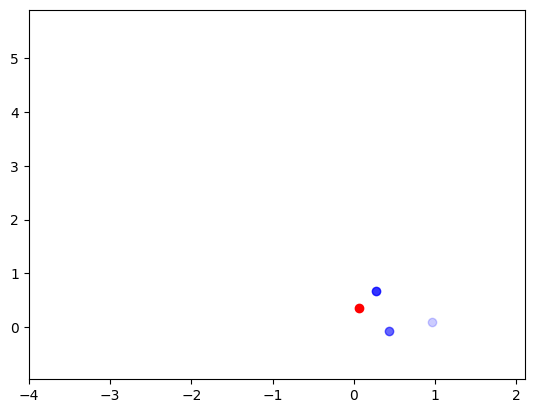

In [ ]:
def animate_frames_with_trail(data, pause_time=0.1):
    # for t in range(6, data['time'].max() + 1):  # Start from 6 since we don't have lagged data before t=6
  for t in range(6, 107):
        # Clear previous frame's plots except the first time
        fig, ax = plt.subplots()
        ax.clear()
        # ax.set_xlim(data['X_lag_0'].min(), data['X_lag_0'].max())
        # ax.set_ylim(data['Y_lag_0'].min(), data['Y_lag_0'].max())
        ax.set_xlim(Xmin, Xmax)
        ax.set_ylim(Ymin, Ymax)
        # Plot each of the last 5 positions with decreasing alpha
        for i in range(6):
            alpha_value = 1 - (i * 0.2)  # Decrease alpha for older positions
            if i == 0:
                ax.scatter(data.loc[data['time'] == t, f'X_lag_{i}'], data.loc[data['time'] == t, f'Y_lag_{i}'], alpha=alpha_value, color='red')
            else:
                ax.scatter(data.loc[data['time'] == t, f'X_lag_{i}'], data.loc[data['time'] == t, f'Y_lag_{i}'], alpha=alpha_value, color='blue')
        plt.show()
        time.sleep(pause_time)
        clear_output(wait=True)

# Call the function with your data
animate_frames_with_trail(df_per_second_lagged, pause_time=0.05)


In [ ]:
# Define the function to animate the frame movement
def animate_frames(data, pause_time=0.1):
    for t in range(1, data['time'].max() + 1):
        fig, ax = plt.subplots()
        frame_data = data[data['time'] == t]
        ax.scatter(frame_data['X_lag_0'], frame_data['Y_lag_0'])
        ax.set_xlim(data['X_lag_0'].min(), data['X_lag_0'].max())
        ax.set_ylim(data['Y_lag_0'].min(), data['Y_lag_0'].max())
        ax.set_title(f"Frame {t}")
        ax.set_xlabel("X Position")
        ax.set_ylabel("Y Position")
        plt.show()

        # Pause for a bit then clear the plot so the next one can be shown
        time.sleep(pause_time)
        clear_output(wait=True)

# Call the function to start the animation
# Note: Adjust 'pause_time' as needed for your desired speed
animate_frames(df_per_second_lagged, pause_time=0.01)
